<a href="https://colab.research.google.com/github/Ramsabarish007/ModernAI_bootcamp/blob/main/CNN_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
# required to get plots on the Jupyter notebook

# **A friendly introduction to Deep Learning with Keras and TensorFlow**

**Resources: [Daniel Moser (UT Southwestern Medical Center)](https://github.com/AviatorMoser),[Xavier Snelgrove](https://github.com/wxs/keras-mnist-tutorial), [Yash Katariya](https://github.com/yashk2810/MNIST-Keras)**

**Adapted by**: Vishnu (Ex.Invento- IIT Madras) <br>
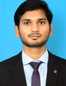


# **Dense Fully Connected Network(DFCN)**


A beginner's introduction to the fundamentals of deep learning, this demo will walk through the basic steps of building **a toy model** for **classifying handwritten numbers** with accuracies surpassing **95%**. This first model will be a basic **fully-connected** neural network. In a future notebook we will be seeing a deeper network that introduces the concepts of **convolution** and pooling that performs significantly better at this task.

## **Our task for the AI**

*  What we have? *A large corpus of handwritten images and their corresponding labels*
*  Our Goal? *Make an AI to automatically learn the patterns and features from the data so that it will be capabale of correctly labelling future handwritten images*
*  Dataset source: *Handwritten digits from the MNIST database. 60k Training and 10K test images.*

We will use the **Keras Python API** with TensorFlow as the backend.

**Why Keras?** *Keras is the most easy to use the library for machine learning for beginners. Being simple helps it to bring machine learning from imaginations to reality. It provides an infrastructure that can be learned in very less time. Using Keras, you will be able to stack layers like experts.*

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## **Importing the Necessary Python Modules**


In [ ]:
import numpy as np                   # Optimized scientific computing library
import matplotlib.pyplot as plt      # For plotting
import random                        # for generating random numbers
from keras import models             # used for loading the saved model

from keras.datasets import mnist     # importing the dataset
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

## **Loading Training Data**

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
train_data, test_data = mnist.load_data()
X_train, y_train = train_data
X_test, y_test = test_data

print("Printing the shapes for validation. Format for shape : (n_elements, n_rows, n_cols)")
print(f"X_train :  {X_train.shape}, y_train :  {y_train.shape}")
print(f"X_test  :  {X_test.shape}, y_test  :  {y_test.shape}")

11501568/11490434 [==============================] - 0s 0us/step
Printing the shapes for validation. Format for shape : (n_elements, n_rows, n_cols)
X_train :  (60000, 28, 28), y_train :  (60000,)
X_test  :  (10000, 28, 28), y_test  :  (10000,)


**Let us plot some sample images from the training set, using Matplotlib.**

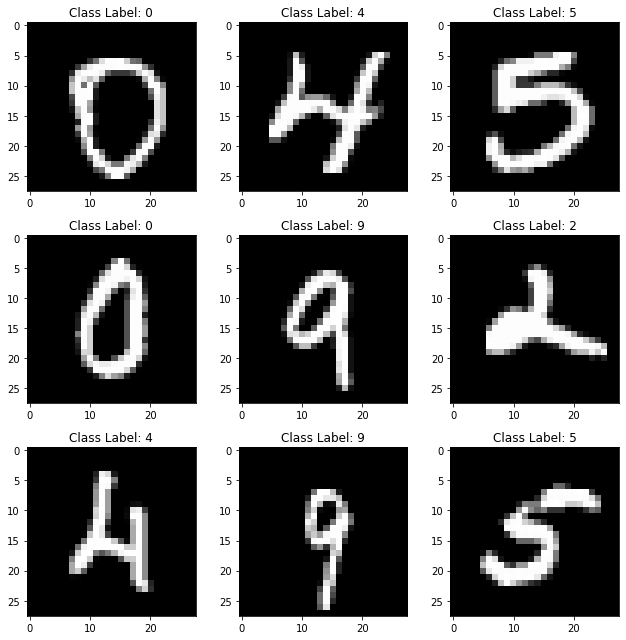

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Changing these values to Make the figures a bit bigger ("rc" params are like configuration parameters)

#Plotting some 9 samples in a 3x3 grid for data visualization
for i in range(9):
    plt.subplot(3,3,i+1)
    index = random.randint(0, len(X_train)) # random image index in the valid range
    plt.imshow(X_train[index], cmap='gray')  # color map -> gray as it is a black and white image
    plt.title(f"Class Label: {y_train[index]}")

plt.tight_layout()

Now that we have visualized how the training samples look like,

### **Let's examine a single digit a little closer, and print out the array representing the digit.**

In [ ]:
np.set_printoptions(linewidth=120)  # Making line width large so that the entire first row is printed as one row!

print(np.matrix(X_train[index]))    # Let us examine the pixel values of the last number from above

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 102 102  41   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 132 253 254 253 254 253 255 253  62   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  41 213 252 253 252 25

### **Comments:**
* This array is what your computer receives and operates with.

* If we follow the non-zero pixels we can see the number!

* This is a black and white image. Here the pixel values correspond to light * intensities. Each pixel is an 8-bit integer from 0-255. 0 is full black, while  255 is full white.


* This is what we call a single-channel pixel. It's called monochrome.

* *Fun-fact! Your computer screen has three channels for each pixel: red, green, blue. Each of these channels also takes an 8-bit integer. 3 channels -- 24 bits total -- 16,777,216 possible colors!*

## **Formatting the input data layer**

* Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

* Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

**Note** : *By flattening the the matrix, we loose the connectivity information of the input pixels. i.e: The model has no idea that the pixels at (1,1) and (2,1) are adjacent pixels(vertically connected). The model we build here, makes no use of the information that adjacent pixels (horizontal/vertical/diagonal/across any direction) are similar and contain a piece of informaiton if grouped together. Keep this fact at the back of your mind, we will come back to this, when we solve the same problem using* **Convolutional Neural Networks**!

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print(f"Training matrix shape now:  {X_train.shape}")
print(f"Testing matrix shape now: {X_test.shape}")

Training matrix shape now:  (60000, 784)
Testing matrix shape now: (10000, 784)


**We then modify our classes (unique digits) to be in the one-hot format, i.e.**

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

**If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:**

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
**then it is most probable that the image is that of the digit `1`**.



In [ ]:
# Converting the given y-labels to ONE HOT ENCODED VECTORS form
n_classes = 10 # number of unique digits/classes

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

## **Building a 3-layer fully connected network (FCN)**

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

In [ ]:
# The Sequential model is a linear stack of layers and is very common.
model = Sequential()

### **The first hidden layer**

In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [ ]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))
# It is this RELU FUNCTION that brings in non-linearity to the network, which then unlocks the model to be able to generalize to literally any function,
# given a large enough network!

$$f(x) = max (0,x)$$
<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/relu.jpg?raw=1' >

In [ ]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

<img src = "https://d3i71xaburhd42.cloudfront.net/34f25a8704614163c4095b3ee2fc969b60de4698/2-Figure1-1.png" >

#### **Intuition:**
If some of the nodes are randomly not available to the model for making its prediction during training phase, it means that the other nodes are forced to be able to make the right prediction, even in the absence of the missing nodes' information. This means, the information is forced to be uniformly spread across all the nodes of the network, and the neural network cannot cheat by using the information contained in one or two nodes alone for making the predictions.

### **Adding the second hidden layer**

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

### **The Final Output Layer**

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))



<img src = "https://www.researchgate.net/profile/Nabi-Nabiyev-2/publication/349662206/figure/fig3/AS:995882686246913@1614448343589/Working-principles-of-softmax-function.jpg" >

**Intuition**:
It is really a neat way of converting The activation values of Output layer into Probabilities of the image belonging to each of the classes!

In [ ]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

### **Compiling the model**

* Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

* When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

* Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

* The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

<img src = "https://mlfromscratch.com/content/images/2019/12/gradient-descent-optimized--1-.gif" >
This is a beautiful illustration of gradient descent.
Have a close look at this awesome GIF.

This is literally where all the **MAGIC** of **learning patterns** from **data** happens!

What **gradient descent** does is, find the direction in which each of the parameters need to be tweaked, so that, the loss will become lesser in the next iteration!

*Put very bluntly, Gradient descent is when there is an error between the expected value and the predicted value,
Each parameter, interacts with the model's loss value manually, and try to improve them for the next iteration!*

**Parameter**:  "Ohh, Sorry, for the error/mistake, may I know what changes I need to make to myself, so that I can hopefully reduce the error, the next time around?"


**Model**: Sure, if you slightly increase/decrease your value, it might reduce the total Loss of our company.


**Parameter**: Thanks, will work on it, and let's see how it goes, next time!

If all the parameters do this at the same time, and they do it in appropriate step sizes, for long enough, everything will Converge to the Global Minimum. One more nuance is that They change in proportion to their gradient value. i.e: If some parameter has a large impact on the Change in loss value, it will be changed more at this time-step, so that we are leveraging its ability to reduce the loss faster.   

* **But first**, our main task is make sure that the **LOSS FUNCTION** actually corresponds to some scalar that is a measure of **how well/bad** our **model** is **performing** at the task we intend it to perform. In this case, our loss function captures, how confidently our model is able to predict the right numbers, which is the behaviour we incentivise our Model by rewarding it when it is good. And punishing with heavy fines when the loss is bad!

* So, if we are able to automatically incentivise(define it once, sit back, relax!) Good behaviour and automatically punish bad behaviour using appropriate metrics (**LOSS FUNCTIONS**) that are **true** to the **essence** of **"what We want to achieve**", then

* **Just providing correctly labelled data is enough for the model to automatically learn how to get Good at that particular task**, by trying to predict the labels of the training data with randomly initialized weights ->  failing -> automatically tweaking it's weights to be better suited to do it in the next iteration, using Gradient Descent!
*  Eventually, successfully learning the underlying features of the data that we want it to learn!




<img src = "https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" >

***So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.***

<img src = "https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/complicated_loss_function.png?raw=1" >

In [ ]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#If you want to understand how categorical Cross entropy works check out this cool video from StatQuest : https://youtu.be/6ArSys5qHAU


#### **Comments:**
* We use **Adam optimizer** for tuning weights, The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning.

* **Categorical Cross Entropy**: Non linearly penalizes Low Confidence on the correct label, with a large loss, and has very low loss if the confidence is close to 1.

* The tuning of weights happen based on the Gradients of the loss function and not the accuracy! This is because, the accuracy(highest probability class) remains the same if the confidence of the model in predicting a class is 60% or 90%. But losses, depend on the how confident the model is able to classify a particular image to its own class! So, we have the Loss function and the weight updation happening based on the values of the loss function. This means, the model is asked to learn features that enable it to classify images to its own class as confidently as possible!


## **Train the model!**
*This is the fun part!*

* The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

* Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

* Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

* So a good batch size may take some trial and error to find!

In [ ]:
# Now let's train the model
history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test),
          batch_size=128, epochs=5, verbose=1)
#EPOCH - In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs.
#In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data).

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2515 - accuracy: 0.9239 - val_loss: 0.1050 - val_accuracy: 0.9666
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1005 - accuracy: 0.9686 - val_loss: 0.0859 - val_accuracy: 0.9722
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0727 - accuracy: 0.9767 - val_loss: 0.0818 - val_accuracy: 0.9737
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0568 - accuracy: 0.9815 - val_loss: 0.0670 - val_accuracy: 0.9790
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.0710 - val_accuracy: 0.9801


* The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data.

* We see that The loss goes down and the accuracy improves with time.

* But how does it do on data it did not train on?

### **Let us plot the losses and see!**

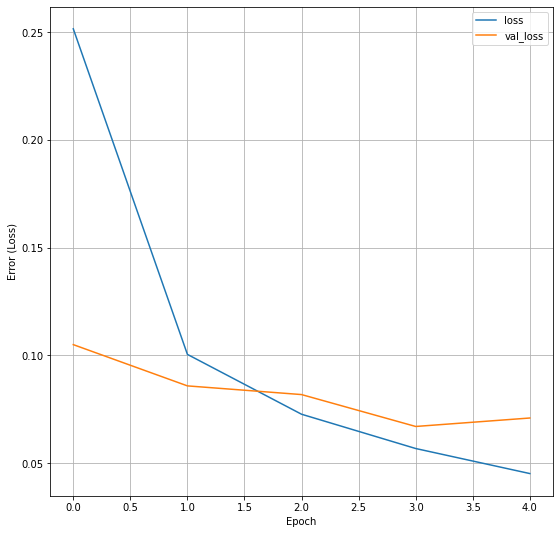

In [ ]:
# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

plot_loss(history)

## **Evaluate Model's Accuracy on Test Data**

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9801
Test score: 0.07095347344875336
Test accuracy: 0.9800999760627747


### **Inspecting the output**

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=-1) # we get probabilities for each of the class, and the argmax corresponds the class index with the highest probability

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

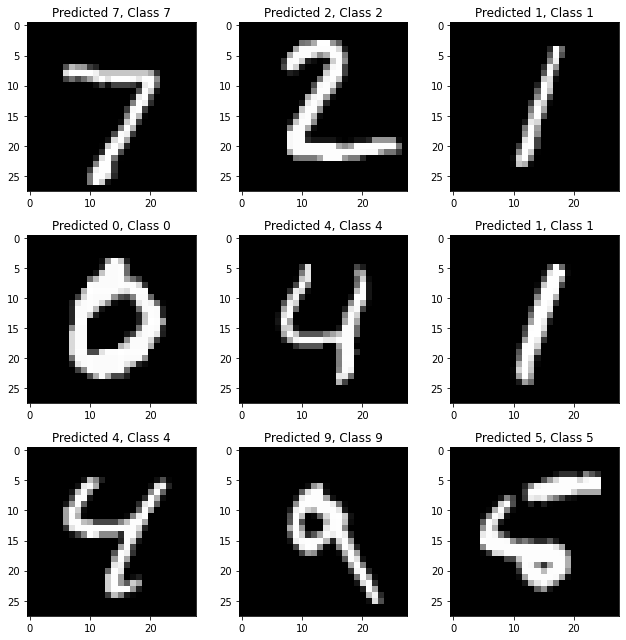

In [ ]:
# Let us examine the Correctly labelled images
plt.rcParams['figure.figsize'] = (9,9) # Change these values to Make the figures bigger/smaller
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted_classes[correct]}, Class {y_test[correct]}")

plt.tight_layout()

**Let us exanine a few of incorrectly labelled images and think see if they the model's predictions are reasonable!**

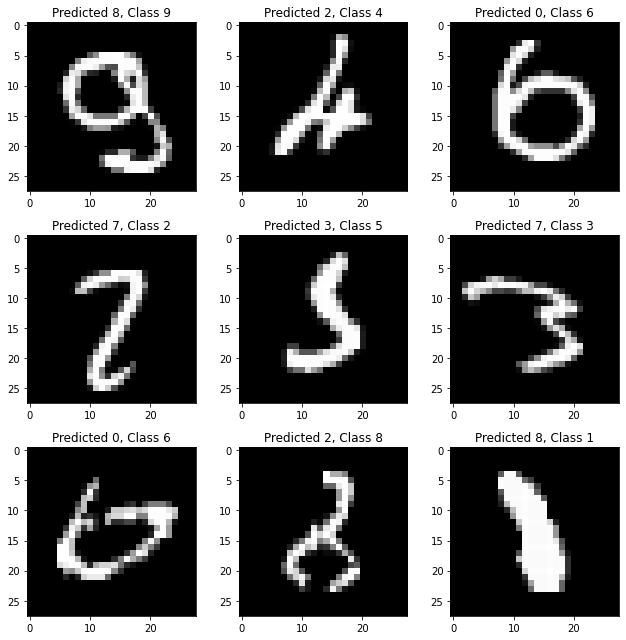

In [ ]:
# Let us examine the InCorrectly  labelled images
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted_classes[incorrect]}, Class {y_test[incorrect]}")

plt.tight_layout()

**Some of these images are not clear enough, and we can have some Excuse for the model in misclassifying these!**

## **Trying experimenting with the batch size, Number of layers, number of nodes in each of the layers etc.!**

* How does increasing the batch size to 10,000 affect the training time and test accuracy?

* How about a batch size of 32?

## **Now that The model has been trained, we would like to save it, download it, load it and use it for future inferences.**

In [ ]:
# Save model
model.save("trained_model.h5")

# Load the saved model
saved_model = models.load_model('trained_model.h5')


In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1) # we get probabilities for each of the class, and the argmax corresponds the class index with the highest probability
predicted_classes_from_saved = np.argmax(saved_model.predict(X_test), axis=-1)
(predicted_classes == predicted_classes_from_saved).all()


True

***We can see that the Saved model's predictions match the Original model's prediction, confirming that we have been able to properly save and retrieve our model and it it works identically to the model trained on Google Colab!***

# **Convolutional Neural Network(CNN)**

## *A small note on Jupyter Notebooks*
Before we get started, I would like you use this feature of Jupyter Notebooks(incase you didn't know already)
* we can  fold and unfold contents in the Jupyter notebook based on their Indentation levels.
* This means we can use the Notebook like a function wrapper, and wrap different sections and sub-sections of the notebook as blocks and work with them easily. For example, the entire Last notebook can be folded into a cell, just by clicking on the arrow near its heading (Dense FCN).
* This makes the notebook, easy to read, and also run sections of code, collectively at once making it --> easy to read, interact and overall fun to work with!

## **Introducing Convolution! What is it?**

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This is possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

<img src = "https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/convolution.gif?raw=1" >

In the above example, the image is a 5 x 5 matrix and the kernel/filter going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.



<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/kernels.png?raw=1' >

* Here, we can see an identity filter does nothing, as it retains the central pixel's value without altering it with any of the surrounding pixels.
* Look at the Sharpen filter, intuitively what we are doing here is:
make 5 copies of the central pixel, and from 4 of those copies subtract the pixel features of the neighboring pixels. What we are left with is one central pixel + 4 x (features that are unique to the central pixel), basically sharpening that features that are unique to that pixel alone in the neighborhood!
* Look at Box Blur, here all we are doing is, replacing the central pixel with the average of all pixels surrounding it. This means, information specific to this pixel loses its importance, as we are averaging it out. Doing the reverse of what we did for sharpening.
* One more interesting observation to make here, is thatin all cases other than edge detection, we are replacing one pixel's information with one pixel only. +(5 x center)-(4 x neigbours) = 1 , 1/9 x 9(pixels in that region) = 1. You can add them up and verify for yourselves! This means, that we are replacing the original image with another image with a focus on some specific attribute/modification applied to it.
* But in edge detection, we don't want the image back, we only care about the presence of patterns, hence, it sums to 0. Ie. We only capture whether a feature(information arising due to transition in pixel values in specific patterns) exists or not. If a specific transition happens, it is detected. Else it will be all black. As overall, all the pixels that are close together will have similar pixel values. So, simply adding and subracting surrounding pixels which are mostly bound be similar to each other will always end up with a value close to 0. Unless specific interesting transitions happen in that region, and is being captured by the filter.

**Must watch Interesting videos on Convolution Filters**

* [Andrew NG - Convolution intuition](https://youtu.be/XuD4C8vJzEQ?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF)
* [Grant Sanderson(3Blue1Brown)'s deepdive](https://youtu.be/8rrHTtUzyZA?t=75)

**MAX POOLING:** It is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer. It adds a small amount of translation invariance - meaning translating the image by a small amount does not significantly affect the values of most pooled outputs. This significantly reduces the number of learned parameters, and decreases the computational cost (e.g. system memory, amount of data that needs to processed in further layers etc.). The idea is to keep the most of the information contained in the region, with much less memory and features!



<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/max_pooling.png?raw=1' >

<img src = "https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/convolution.gif?raw=1" >

**Intuition:** If we think about it, if a filter/kernel's pattern matches at a location in the image, it is also likely produce a decent match in the next closest slide. As, most of the pixels remain the same, as we slide our filter across the input image. In such a case, we don't have to keep the information of how much the kernel matched on each small slide of the Sliding Filter. We only need to have an overall Sense of how much our Filter's pattern matched with the image over a certain region. So, we can only keep the best match, as an information holder to the model that, this filter's pattern matched in this region of the image.

**We can also take convolutions of convolutions** -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

Intuitively, this means first we look for low level basic patterns, like lines and curves in the initial layers. And then, in further layers, find patterns that match combinations of these low level patterns in meaningful manners, to higher and higher levels of abstraction, until it can detect the whole image near its final layers.

*Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

<img src = 'https://miro.medium.com/max/1400/1*OHifHVQLIIumP865ASipXA.png' >

## **Building a "Deep" Convolutional Neural Network**

### **Importing the required packages**

In [ ]:
import numpy as np                   # Optimized scientific computing library
import matplotlib.pyplot as plt      # For plotting
import random                        # for generating random numbers
from sklearn.metrics import confusion_matrix  # for getting confusion matrix
import seaborn as sns                # for plotting the confusion matrix as a heatmap


from keras.datasets import mnist     # importing the dataset
from keras import models             # used for loading the saved model
from keras.models import Sequential  # Model type to be used
from keras.utils import to_categorical   # to convert

# import some additional tools
from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten # for convolution related operations
from keras.layers import BatchNormalization              # for normalization of inputs

### **Loading the data, and normalizing**

In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print(f"Training matrix shape:  {X_train.shape}")
print(f"Testing matrix shape:   {X_test.shape}")

Training matrix shape:  (60000, 28, 28, 1)
Testing matrix shape:   (10000, 28, 28, 1)


In [ ]:
# one-hot format classes

n_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

### **Defining the Model Architecture**

In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(16, (3, 3), input_shape=(28,28,1))) # 16 different 3x3 kernels -- so 16 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(16, (3, 3)))                        # 16 different 3x3 kernels -- so 16 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(16,(3, 3)))                         # 16 different 3x3 kernels -- so 16 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(16, (3, 3)))                        # 16 different 3x3 kernels -- so 16 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x16 output matrix into a 256-length vector

# Fully Connected Layer 5
model.add(Dense(128))                                # 128 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.30))                              # 30% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 16)       

**This CNN Model has only 40k parameters which is much much smaller in comparison to the previous Dense FCN which we built that had 670k parameters**.
Let us also compare their performances when we train the model to see if this model can keep up with the Dense FCN despite having so few parameters!

In [ ]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### **Fitting the Model**

In [ ]:
# We can now train our model which is fed data by our batch loader

# Now let's train the model
history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test),
          batch_size=128, epochs=3, verbose=1)
history2 = model.fit(X_train, Y_train,validation_data=(X_test, Y_test),
          batch_size=512, epochs=2, verbose=1)
#Note: In Keras, if we call fit again, on a model that has been partially trained, it will continue the training from that point, instead of training from scratch!
# So, if we want to restart the training from scratch, you have to re-declare the model, re-compile it, and then do the training routine!

Epoch 1/3
469/469 [==============================] - 13s 8ms/step - loss: 0.2240 - accuracy: 0.9368 - val_loss: 0.1587 - val_accuracy: 0.9553
Epoch 2/3
469/469 [==============================] - 3s 7ms/step - loss: 0.0622 - accuracy: 0.9815 - val_loss: 0.0356 - val_accuracy: 0.9896
Epoch 3/3
469/469 [==============================] - 3s 7ms/step - loss: 0.0456 - accuracy: 0.9867 - val_loss: 0.0301 - val_accuracy: 0.9901
Epoch 1/2
118/118 [==============================] - 2s 15ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0273 - val_accuracy: 0.9923
Epoch 2/2
118/118 [==============================] - 2s 14ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.0283 - val_accuracy: 0.9917


**Increasing batch size after the first few epochs have 2 advantages**
1. It is faster to train, as more images are loaded and used for training in parallel.
2. All the images together should point the model to its mistake and correct it, so, this means, the model weight updates depend on an overall trend at this point, rather than tweaking the model weights for specific images' Loss values. That means, only if there is overall improvement for a lot of images at once, the weight updation happens in that direction.

**In this CNN model, we have used only 40,000 model parameters, compared to the roughly 700,000 parameters we had in the fully connected Model, still this outperforms the Dense FCN MODEL!!!**

313/313 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9917
Test score: 0.02829417958855629
Test accuracy: 0.9916999936103821


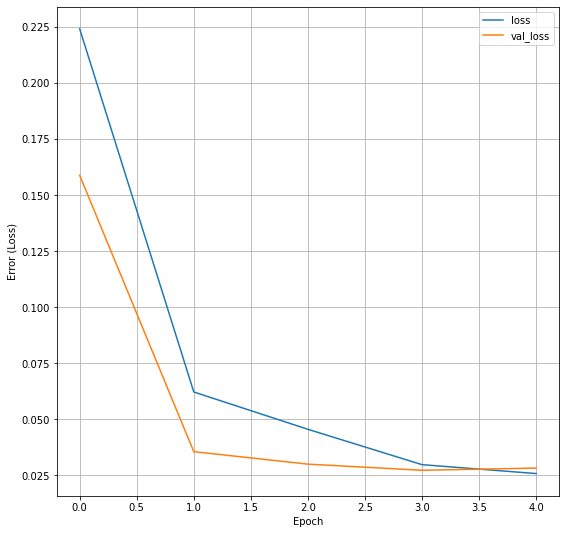

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
# Function to plot loss
def plot_loss(histories):
    loss = []
    val_loss = []
    for history in histories:
      loss.extend(history.history['loss'])
      val_loss.extend(history.history['val_loss'])

    plt.plot(loss, label='loss')
    plt.plot(val_loss, label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)
histories = [history, history2]
plot_loss(histories)

### **Inspecting the output**

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

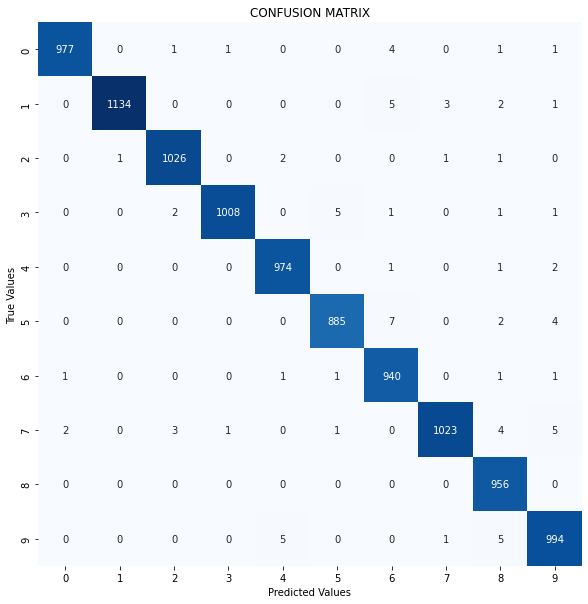

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
y_pred = np.argmax(model.predict(X_test), axis=-1) # we get probabilities for each of the class, and the argmax corresponds the class index with the highest probability

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_test)[0]

incorrect_indices = np.nonzero(y_pred != y_test)[0]

# Let us plot a confusion matrix of the Predictions
fig = plt.figure(figsize=(10, 10)) # Set Figure
mat = confusion_matrix(y_test, y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.title("CONFUSION MATRIX")
plt.show();


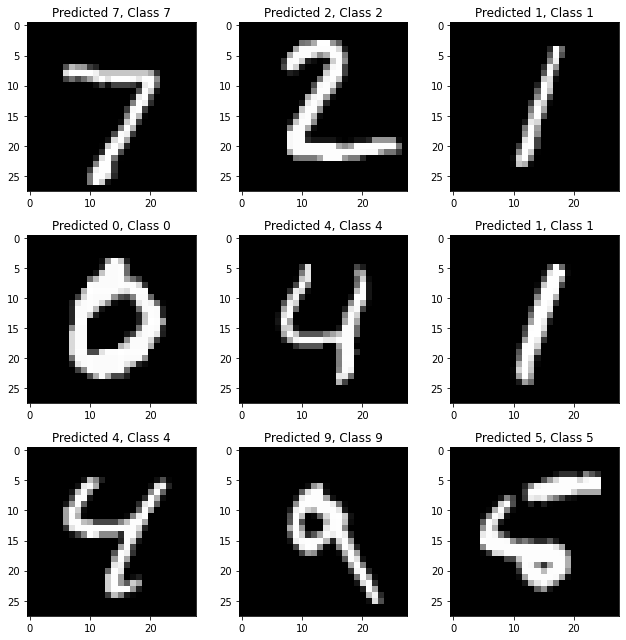

In [ ]:
# Let us examine the Correctly labelled images
plt.rcParams['figure.figsize'] = (9,9) # Change these values to Make the figures bigger/smaller
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {y_pred[correct]}, Class {y_test[correct]}")

plt.tight_layout()

**Let us examine a few of incorrectly labelled images and think see if they the model's predictions are reasonable!**

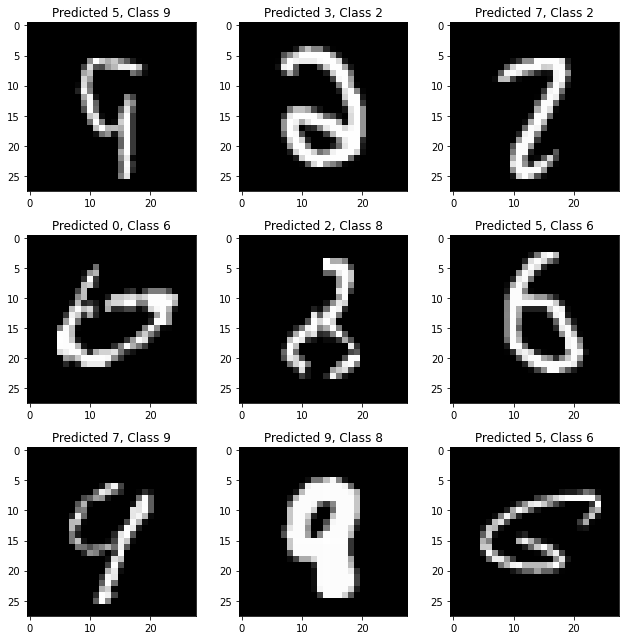

In [ ]:
# Let us examine the InCorrectly  labelled images
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {y_pred[incorrect]}, Class {y_test[incorrect]}")

plt.tight_layout()

**In this CNN model,some of the misclassified images are so unclear, that it might even confuse humans!**

 That being said, there is still room for the model to improve. To further improve the model we can do Things like:
 *  Data Augumentation on training images before they are fed into the model, for the model to learn generalized features.
 *  Run training for more epochs without overfitting.(One has to experiment with different hyperparameters and best practices to find out the best model, and stopping point for training!)
 *  make a larger and deeper model architecture etc.


 to further improve the performance

  Note: One has to keep in mind that, in general the end goal of this process is to train the most efficient model that has learnt the features from the data as effectively as possible, so that it is fast and accurate at the same time. There will always be a trade-off between speed and accuracy. But Larger,more accurate networks aren't always better depending on the use case.

## **Now that The model has been trained, we would like to save it, download it, load it and use it for future inferences.**

In [ ]:
# Save model
model.save("trained_CNN_model.h5")

# Load the saved model
saved_model = models.load_model('trained_CNN_model.h5')


In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1) # we get probabilities for each of the class, and the argmax corresponds the class index with the highest probability
predicted_classes_from_saved = np.argmax(saved_model.predict(X_test), axis=-1)
(predicted_classes == predicted_classes_from_saved).all()


True

***We can see that the Saved model's predictions match the Original model's prediction, confirming that we have been able to properly save and retrieve our model and it it works identically to the model trained on Google Colab!***

## **THE MAIN DIFFERENCES between CNN and FCN and why CNN works**

Let us compare the number of parameters we used in each of the models, and the accuracies.
How is CNN able to perform so much better, despite having so few parameters?

* The key is to understand that information is present, not in the pixel values but in the way they interact and change in the neigborhood and in a global sense. For example: If your screen is all white, you would get no information, if it were all random, you would still get no information, but if there is a clear gradient, or some other pattern arising out of structured transitions, you would easily recognize it! Information is not contained in the raw pixel values at all. It is only when you see a pixel, with its surrounding pixels, you recognize some features locally, go one level higher, understand how that feature fits in that setting, and finally look globally, you start to make complete sense of it!

* In CNNs we have Filters, which are looking for matches of specific patterns in the image, over a small sub-section of the images.
* This means, we are looking for information, not directly in the pixels, but rather in layers of absraction such as low level features like lines, curves, blobs etc. And gradually as we go deeper in the Network, going to higher level features combining these matches lines and curves in meaningful fashions as we move deeper into the network.

* **Parameter sharing:** Since we are looking for patterns using filters and slide it across the image. The matching units, if they are present at different locations in the image are all detected with the use of a single filter's weight parameters! All units within this layer plane share the same weights; hence it is called weight/parameter sharing. **Thus we need much fewer parameters to match patterns, than what what we would need in a Dense FCNN**!

* **Translational Equivariance:** As the same weights are shared across the images, if an object occurs in any image it will be detected irrespective of its position in the image. This property is very useful for applications such as image classification, object detection, etc where there may be multiple occurrences of the object or the object might be in motion. CNNs are naturally equivariant to Translations but are not naturally equivariant to some other transformations such as changes in the scale or rotation of the image. Other mechanisms are required to handle such transformations.

<img src = 'https://miro.medium.com/max/1400/0*0Y8LuG5wPnzO6W3n.jpeg' >
Various instances of Cats detected due to property of Translational Equivariance.

### **For a 3D visualization of a very similar network** visit http://scs.ryerson.ca/~aharley/vis/conv/